0.1.1


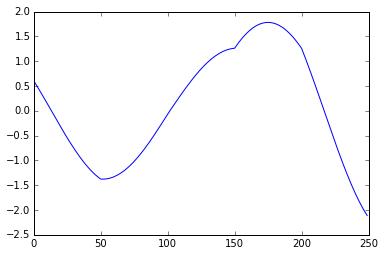

In [37]:
%matplotlib inline
import functools
import numpy as np
import matplotlib.pyplot as pl
from numpy import pi

import importlib
import MegaScreen

importlib.reload(MegaScreen)
print(MegaScreen.__version__)
def TestSpectrum(nfft,fx,fy):
    spectrum=np.zeros((nfft,nfft))
    spectrum[fx%nfft,fy%nfft]=1
    spectrum[-fx%nfft,-fy%nfft]=1
    return spectrum

def TestScreen(nfft,fx,fy):
    return MegaScreen.FftScreen(TestSpectrum(nfft,fx,fy))

generator=MegaScreen.ScrollingRibbon(MegaScreen.SplineTiles(TestScreen(100,0,0)),5)
screen=next(generator)
#pl.imshow(screen,pl.get_cmap("gray"))
pl.plot(screen[:,30])

/Applications/Pineapple-Pro.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


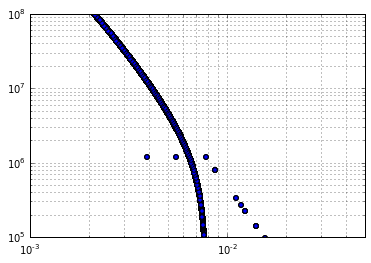

In [44]:
spectrumf=functools.partial(MegaScreen.VonKarmanSpectrum,r0=1.0,L0=1e3)
fOuter,spectrumOuter,fInner,spectrumInner=MegaScreen.TwoScaleSpectra(spectrumf,256,256,frequencyOverlap=2)
ax = pl.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(fOuter.flat[1:],spectrumOuter.flat[1:])
ax.scatter(fInner.flat[1:],np.maximum(spectrumInner.flat[1:],1e-2))
pl.xlim(1e-3,5e-2)
pl.ylim(1e5,1e8)
ax.grid(which="both")

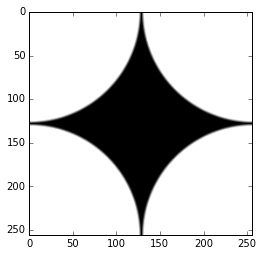

In [46]:
pl.imshow((np.minimum(1e5,spectrumInner)),pl.get_cmap("gray"))

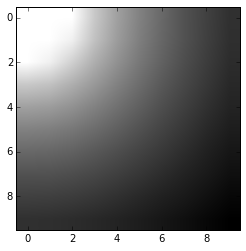

In [52]:
pl.imshow(np.log(spectrumOuter[0:10,0:10]),pl.get_cmap("gray"))